In [1]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Random seed
np.random.seed(7)
random.seed(7)
random_state=7

In [3]:
train = pd.read_csv('./datasets/train.csv')

In [61]:
letter_A = train.query("letter == 'A'")
letter_A

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


In [62]:
(train['letter']=='A').value_counts().sort_values()

True       72
False    1976
Name: letter, dtype: int64

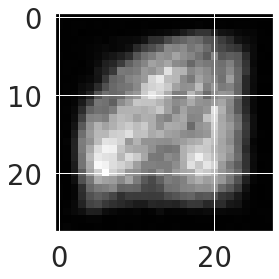

In [68]:
new_letter = np.zeros((28,28))

for i in range(0,72):
    img = letter_A.iloc[i, 3:].values.reshape(28, 28)
    
    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)

    # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
    mask_hole=np.array(center).max()

    sub_res = res
    sub_res = np.where(sub_res==mask_hole, 0, 1)
    mask_0=sub_res.reshape(28, 28)

    masked_img = img*mask_0
    masked_img = masked_img.reshape(28,28)

    # 구멍뚫린 letter 이미지를 모두 더한다.
    new_letter = new_letter + masked_img

new_letter = (new_letter/30).astype(int)

plt.imshow(new_letter, cmap='gray')
plt.show()

In [69]:
new_letter

array([[  5,   4,   4,   4,   4,   4,   4,   5,   5,   5,   4,   4,   5,
          4,   4,   4,   4,   5,   4,   5,   4,   4,   4,   4,   4,   5,
          5,   5],
       [  5,   4,   5,   5,   4,   5,   4,   5,   5,   4,   4,   5,   4,
          4,   4,   5,   5,   5,   6,   5,   5,   5,   4,   5,   5,   5,
          4,   4],
       [  4,   4,   5,   3,   4,   4,   5,   5,   4,   5,   5,   6,   8,
          9,  11,  15,  24,  33,  41,  41,  27,  17,  15,  10,   8,   8,
          5,   4],
       [  4,   4,   4,   5,   5,   6,   5,   8,  10,  10,  11,  18,  37,
         38,  57,  71,  77,  86,  81,  65,  62,  47,  36,  18,  13,   9,
          5,   5],
       [  4,   4,   5,   5,   6,   8,  10,   8,  10,  14,  34,  51,  60,
         73, 103,  99, 105,  89,  97,  81,  65,  56,  47,  41,  20,  11,
          4,   5],
       [  5,   4,   4,   5,   6,   9,  15,  19,  26,  37,  66,  85,  94,
        111, 106, 122, 108, 100,  87,  70, 102,  66,  72,  68,  35,  11,
          5,   4],
       [  